In [133]:
import os
import pandas as pd
import numpy as np
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

## Human Data

### Create combined human annotation file

In [134]:

# human_annotation_folder = "../human_annotation"

# # get the paths of the three human annotations
# three_human_csv_files = ['Sander R. Jyhne_image_3.csv', 'Silpa_image_2.csv', 'Weronika_image_1.csv']
# three_human_csv_paths = [os.path.join(human_annotation_folder, file) for file in three_human_csv_files]

# # concatenate all human annotations into a single file
# with open("3_human_annotations.csv", "w") as outfile:
#     for file in three_human_csv_paths:
#         with open(file) as infile:
#             outfile.write(infile.read())
            
# # convert the combined human annotations csv file to a df
# three_human_annotations_df = pd.read_csv("3_human_annotations.csv")
# three_human_annotations_df = three_human_annotations_df.drop(columns=['Unnamed: 0'])

# print(f"Shape of the three human annotations df: {three_human_annotations_df.shape}")

# # get the paths of the remaining human annotations
# remaining_files = ['image_annotations_maria.csv', 'image_annotations_srishti.csv']
# remaining_files_paths = [os.path.join(human_annotation_folder, file) for file in remaining_files]

# # concatenate all human annotations and convert to a df
# with open("2_human_annotations.csv", "w") as outfile:
#     for file in remaining_files_paths:
#         with open(file) as infile:
#             outfile.write(infile.read())
            
# two_human_annotations_df = pd.read_csv("2_human_annotations.csv")
# print(f"Shape of the two human annotations df: {two_human_annotations_df.shape}")

# # merge the two human annotations vertically
# all_human_annotations = pd.concat(
#     [three_human_annotations_df, two_human_annotations_df],
#     ignore_index=True,
#     join='outer'
# )

# # Remove duplicate header rows
# all_human_annotations = all_human_annotations[all_human_annotations['example'] != 'example']
# print(f"Shape of the combined human annotations df: {all_human_annotations.shape}")

# all_human_annotations['no-frame'] = all_human_annotations.apply(
#     lambda row: row['other'] if pd.notna(row['other']) and row['other'] != 'NaN' else (row['none'] if pd.notna(row['none']) and row['none'] != 'NaN' else np.nan), axis=1
# )

# # delete the 'other' and 'none' columns because they have been merged into a single column 'no-frame'
# all_human_annotations = all_human_annotations.drop(columns=['other', 'none'])

# # drop rows where 'changed' is 'False'
# all_human_annotations = all_human_annotations[all_human_annotations['changed'] != 'False']

# # print shape of the final human annotations
# print(all_human_annotations.shape)

# all_human_annotations['all_frames'] = all_human_annotations.apply(
#     lambda row: ', '.join([col for col in all_human_annotations.columns if row[col] == 'True' and col not in ['example', 'changed', 'uuid']]), axis=1 
# )

# all_human_annotations['uuid'] = all_human_annotations.apply(
#     lambda row: row['example'].split('/')[-1].replace('.jpg', '') if pd.isna(row['uuid']) else row['uuid'], axis=1
# )


# ## ----------------- Group by 'uuid' and add all the frames for each unique 'uuid' into a single column 'all_frames' ----------------- ##
# filtered_annotations = all_human_annotations.groupby('uuid').agg({
#     'example': 'first',
#     'all_frames': lambda x: ', '.join(x)
# }).reset_index()

# filtered_annotations_uuid = filtered_annotations[['example', 'uuid', 'all_frames']]

# # all_human_annotations.to_csv("all_human_annotations.csv", index=False)
# filtered_annotations_uuid.to_csv("combined_human_annotations.csv", index=False)

# print(f"Before filtering: {all_human_annotations.shape}")
# print(f"After filtering: {filtered_annotations_uuid.shape}")

# filtered_annotations_uuid.head()


In [135]:
# filtered_annotations = all_human_annotations.groupby('uuid').agg({
#     'example': 'first',
#     'all_frames': lambda x: ', '.join(x)
# }).reset_index()

# filtered_annotations_uuid = filtered_annotations[['example', 'uuid', 'all_frames']]

# print(filtered_annotations_uuid.shape)
# filtered_annotations_uuid.head()

In [136]:
combined_human_annotations = pd.read_csv("combined_human_annotations.csv")

### Display the first 5 rows of the combined annotation file

In [137]:
print(combined_human_annotations.shape)
combined_human_annotations.head()

(664, 3)


,example,uuid,all_frames
0,./data/images/00456abb-2a66-46d5-8b18-df334a4561ef.jpg,00456abb-2a66-46d5-8b18-df334a4561ef,no-frame
1,./data/images/015390f6-3292-471a-a3a5-99c79cb036fe.jpg,015390f6-3292-471a-a3a5-99c79cb036fe,"morality, public opinion"
2,./data/images/01631531-1586-4983-99b7-6398e321bbe2.jpg,01631531-1586-4983-99b7-6398e321bbe2,no-frame
3,./data/images/01643676-1a40-450d-811c-4aed42721fae.jpg,01643676-1a40-450d-811c-4aed42721fae,economic
4,./data/images/01fe574f-2b8d-433f-93db-226861727924.jpg,01fe574f-2b8d-433f-93db-226861727924,"policy prescription and evaluation, fairness and equality, cultural identity"


### Check for any nan values

In [138]:
# Check for any NaN values in the dataframe
nan_rows = combined_human_annotations[combined_human_annotations.isna().any(axis=1)]

# Print rows with NaN values if any
if not nan_rows.empty:
	print("Rows with NaN values:")
	print(nan_rows)
else:
	print("No NaN values found in the dataframe.")

# Display the first 5 rows of the dataframe
nan_rows

No NaN values found in the dataframe.


,example,uuid,all_frames


### Create a split sampe of the combined annotation file

In [139]:
# data_csv_path = f"../data_pixtral_llava/sampled_annotated_articles_600.csv"

# n=15
# sampled_data = pd.read_csv(data_csv_path).sample(n=n)
# sampled_data.to_csv(f"../data_pixtral_llava/sampled_annotated_articles_{n}.csv", index=False)

# print(sampled_data.shape)

## Pixtral data

### Read the new pixtral annotation from pixtral annotations

In [140]:
pixtral_json = pd.read_json("../data_pixtral_llava/Pixtral_annotations_revision.jsonl", lines=True)

# convert the pixtral json to a df
pixtral_df = pd.DataFrame(pixtral_json)
pixtral_df.head(2)


,frame-id,frame-name,frame-justification,image_url,title,uuid,text_frame_name,frame-jusitification
0,7,Crime and punishment,"The image depicts an individual who has stolen a flag and is shown beating another person, suggesting criminal activities and their implications.",images/0f127b67-dcde-4a2e-8b83-6ff09bf824f9.jpg,"Biden admin facing mounting backlash after migrant attacks homeowner, steals flag: 'Becoming a trend'",0f127b67-dcde-4a2e-8b83-6ff09bf824f9,security and defense,NaN
1,11,Cultural identity,"The image depicts a group of traditional dancers wearing vibrant costumes, which indicates a cultural celebration, typical of cultural identity discussions.",images/36c8e59c-e3b8-45c9-9fe0-1368e6302ac4.jpg,Westwood celebrates Día de los Muertos with 3-day festival,36c8e59c-e3b8-45c9-9fe0-1368e6302ac4,policy prescription and evaluation,NaN


## Merge human annotations with pixtral annotations
- Merge on uuid
- Save the merged annotations to a new file: model_human_annotations.csv

In [141]:
model_human_annotations = pd.merge(
    pixtral_df, 
    combined_human_annotations[['uuid', 'example', 'all_frames']], 
    on='uuid', 
    how='inner'
)

print(model_human_annotations.shape)
# model_human_annotations.head(3)

(600, 10)


### Calculate frame accuracy for human vs model annotations

In [142]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [143]:
model_human_annotations = model_human_annotations.fillna('NaN')

# convert 'frame-name' to lowercase and 'all_frames' to lowercase
model_human_annotations['frame-name'] = model_human_annotations['frame-name'].str.lower()
model_human_annotations['all_frames'] = model_human_annotations['all_frames'].str.lower()

model_human_annotations['frame_accuracy'] = model_human_annotations.apply(
    lambda row: 1 if row['frame-name'] in row['all_frames'] else 0, axis=1
)
# model_human_annotations.head(3)

In [144]:
print(model_human_annotations.shape)
model_human_annotations[['uuid', 'text_frame_name', 'frame-name', 'frame-justification', 'all_frames', 'frame_accuracy']].head(3)

(600, 11)


,uuid,text_frame_name,frame-name,frame-justification,all_frames,frame_accuracy
0,0f127b67-dcde-4a2e-8b83-6ff09bf824f9,security and defense,crime and punishment,"The image depicts an individual who has stolen a flag and is shown beating another person, suggesting criminal activities and their implications.",crime and punishment,1
1,36c8e59c-e3b8-45c9-9fe0-1368e6302ac4,policy prescription and evaluation,cultural identity,"The image depicts a group of traditional dancers wearing vibrant costumes, which indicates a cultural celebration, typical of cultural identity discussions.",cultural identity,1
2,7d63aa64-b321-4a38-9924-f65852030006,external regulation and reputation,fairness and equality,NaN,political,0


In [145]:
accuracy = model_human_annotations['frame_accuracy'].sum() / model_human_annotations.shape[0]
print(f"Frame accuracy: {accuracy}")


Frame accuracy: 0.31666666666666665


### Show all rows where frame accuracy is 1

In [146]:
accurate_frames = model_human_annotations[model_human_annotations['frame_accuracy'] == 1]
accurate_frames[['frame-name', 'all_frames', 'frame-justification', 'frame_accuracy']]
# accurate_frames[['title', 'caption', 'uuid', 'frame-name', 'frame-justification', 'all_frames', 'frame_accuracy']].head(3)

,frame-name,all_frames,frame-justification,frame_accuracy
0,crime and punishment,crime and punishment,"The image depicts an individual who has stolen a flag and is shown beating another person, suggesting criminal activities and their implications.",1
1,cultural identity,cultural identity,"The image depicts a group of traditional dancers wearing vibrant costumes, which indicates a cultural celebration, typical of cultural identity discussions.",1
5,economic,"capacity and resources, economic","The image includes a calculator and pen, which are typically associated with financial calculations and budgeting, suggesting an economic context.",1
6,health and safety,health and safety,"The image depicts vehicles navigating through a flooded road caused by a natural event, illustrating potential hazards and safety concerns for drivers and the community at large.",1
7,security and defense,security and defense,"The image features individuals in military uniforms carrying bags, suggesting they are involved in activities related to security or defense.",1
...,...,...,...,...
585,security and defense,"quality of life, political, security and defense, health and safety, morality","The image shows a person dressed in combat gear, holding a weapon, and wearing a head covering with writings and symbols indicative of a group involved in military or defensive activities. The presence of the individual with armed equipment suggests a theme of security, defense, and potential conflict.",1
586,public opinion,"quality of life, political, public opinion","The image depicts a protest or demonstration with a crowd holding flags and a portrait, indicating a gathering of public opinion and general attitudes towards a specific issue or cause.",1
588,political,"political, public opinion","The man is speaking at an event with a backdrop that includes text which suggests it is a formal ceremony or award show, indicating elements of political significance often present at such events.",1
594,political,"political, public opinion","The image shows a person holding a microphone with a-badge from 'Des Moines Register' and pointing at a map with various routes, suggesting it is likely related to political campaigning or elections.",1


### Show all rows where frame accuracy is 0

In [147]:
# Show all rows where frame accuracy is 0
inaccurate_frames = model_human_annotations[model_human_annotations['frame_accuracy'] == 0]
# inaccurate_frames[['title', 'uuid', 'caption', 'frame-name', 'frame-justification', 'all_frames', 'frame_accuracy']].head(10)

In [148]:
inaccurate_frames[['frame-name', 'all_frames', 'frame-justification', 'frame_accuracy']]

,frame-name,all_frames,frame-justification,frame_accuracy
2,fairness and equality,political,NaN,0
3,none,cultural identity,"The image shows the logo of the International Cricket Council, which does not explicitly fit into any of the provided frames. It is neither related to finance, resources, morality, fairness, legality, policy, crime, security, health, quality of life, cultural identity, public opinion, politics, nor external regulation. Therefore, it does not clearly communicate any specific frame.",0
4,"legality, constitutionality and jurisprudence","political, external regulation and reputation","The image contains individuals sitting in a formal setting that resembles a courtroom or hearing, suggesting a legal or jurisprudential context. This frame is applicable based on the appearance of the individuals, the microphones, and the formal setting.",0
9,quality of life,no-frame,"The image shows two coffee mugs, a common symbol of daily life and well-being. The context in which these mugs are presented, along with the AXIOS logo, suggests a focus on daily routines and quality of life.",0
10,capacity and resources,"quality of life, health and safety","The image shows a vast agricultural field, indicative of resource management and the capacity of agricultural systems.",0
...,...,...,...,...
593,public opinion,cultural identity,"The image depicts an individual on a sports field, expressing strong emotions which often involve public engagement and opinion, suggesting a frame of public opinion.",0
595,political,no-frame,"The image shows a person using a smartphone to control a smart air conditioning unit, which indicates the theme of modern technology and smart home devices, often related to political discussions around technology advancement and modern lifestyle.",0
596,health and safety,"capacity and resources, economic","The image depicts a rescue operation involving a helicopter, which indicates a scenario dealing with health and safety concerns. The presence of emergency response shows a priority on ensuring safety and resolving a dangerous situation.",0
597,political,no-frame,"The image shows an individual in formal attire with a background that indicates a news program. The presence of the CBS News 'Face the Nation' text implies a political context, likely related to a political discussion or interview.",0


## Plot random pictures with human + model annotations

justification: The image contains elements like handcuffs and there is a news backdrop which suggests an event related to law enforcement or a criminal act.
justification: The image depicts a dark tunnel with a bright light at the end. This does not clearly fit into any of the provided frames as it lacks specific elements that would indicate themes such as finances, policy discussions, criminal activities, or cultural events. Therefore, no specific frame can be identified from the provided list.
justification: The image shows two coffee mugs, a common symbol of daily life and well-being. The context in which these mugs are presented, along with the AXIOS logo, suggests a focus on daily routines and quality of life.
justification: The image features a man wearing glasses and a striped shirt, but there is not enough information to assign it to any specific frame from the provided list. The context and details necessary to identify a definitive frame are missing.
justification: The image 

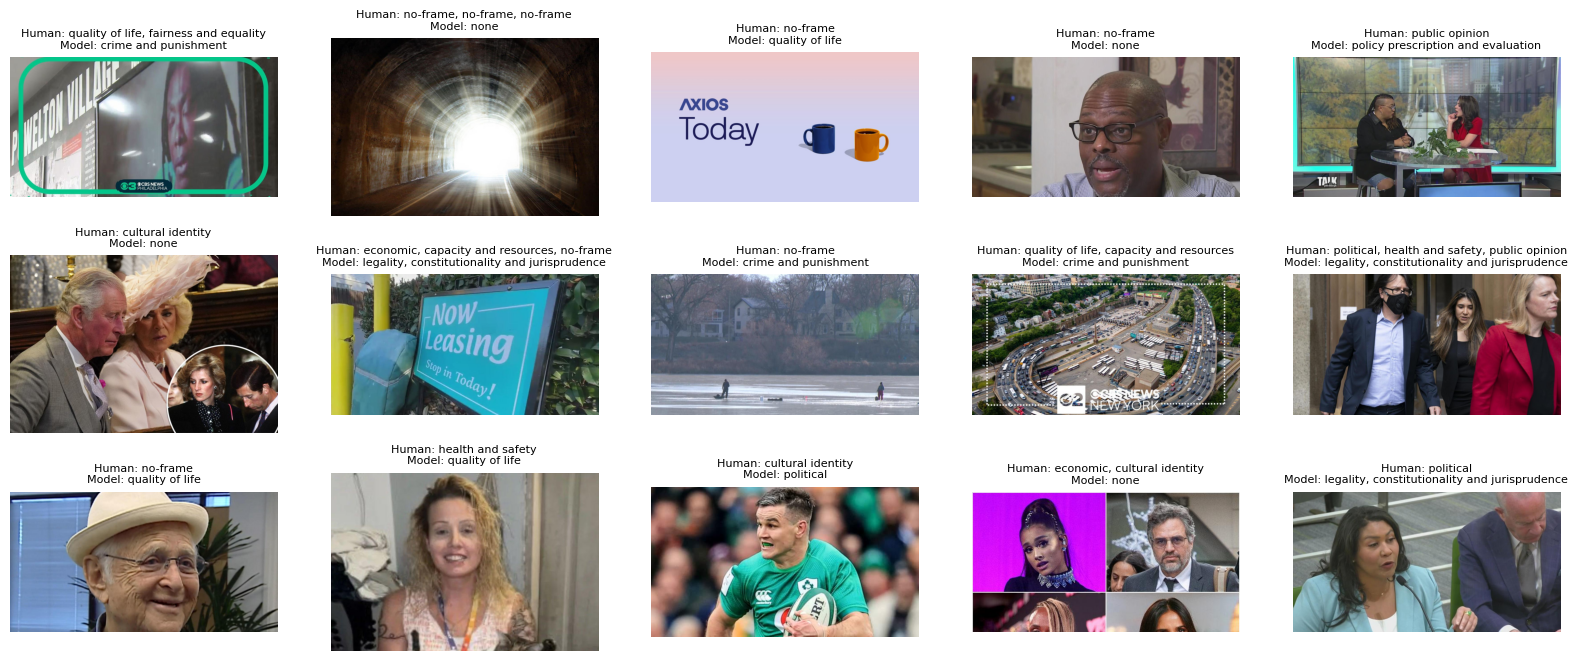

In [149]:
# Function to plot random images with annotations
def plot_random_images(df, num_images=10):
    random_images = df.sample(num_images)
    fig, axes = plt.subplots(3, 5, figsize=(20, 8))
    
    for ax, (_, row) in zip(axes.flatten(), random_images.iterrows()):
        img_path = os.path.join("../data_pixtral_llava/images", row['uuid'] + ".jpg")
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"Human: {row['all_frames']}\nModel: {row['frame-name']}", fontsize=8)
        ax.axis('off')
        print(f"justification: {row['frame-justification']}")

# Plot 10 random images
inaccurate_frames = model_human_annotations[model_human_annotations['frame_accuracy'] == 0]
plot_random_images(inaccurate_frames, num_images=15)


### Accuracy after excluding where human annotation = 'no-frame'

In [150]:
human_annotations_no_frame = model_human_annotations[model_human_annotations['all_frames'] != 'no-frame'].copy()

human_annotations_no_frame.loc[:, 'frame_accuracy'] = human_annotations_no_frame.apply(
    lambda row: 1 if row['frame-name'] in row['all_frames'] else 0, axis=1
)

accuracy_human_no_frame = human_annotations_no_frame['frame_accuracy'].sum() / human_annotations_no_frame.shape[0]

print(f"Frame accuracy after excluding 'no-frame' from human annotations: {accuracy_human_no_frame}")


Frame accuracy after excluding 'no-frame' from human annotations: 0.4033970276008493


### Accuracy after excluding where model frame = none

In [151]:
# Accuracy after excluding where model frame is none

model_annotations_none = model_human_annotations[model_human_annotations['frame-name'] != 'none'].copy()

model_annotations_none.loc[:, 'frame_accuracy'] = model_annotations_none.apply(
    lambda row: 1 if row['frame-name'] in row['all_frames'] else 0, axis=1
)

accuracy_human_annotations_none = model_annotations_none['frame_accuracy'].sum() / model_annotations_none.shape[0]
print(f"Frame accuracy after excluding 'none' from model annotations: {accuracy_human_annotations_none}")


Frame accuracy after excluding 'none' from model annotations: 0.3885480572597137


### Accuracy after excluding where model frame is none &  human annotation = 'no-frame'


In [152]:
# Accuracy after excluding where model frame is none &  human annotation = 'no-frame'

model_human_annotations_no_frame = model_human_annotations[
    (model_human_annotations['frame-name'] != 'none') & 
    (model_human_annotations['all_frames'] != 'no-frame')
].copy()

model_human_annotations_no_frame.loc[:, 'frame_accuracy'] = model_human_annotations_no_frame.apply(
    lambda row: 1 if row['frame-name'] in row['all_frames'] else 0, axis=1
)

accuracy_human_annotations_no_frame = model_human_annotations_no_frame['frame_accuracy'].sum() / model_human_annotations_no_frame.shape[0]
print(f"Frame accuracy after excluding 'none' from model annotations and 'no-frame' from human annotations: {accuracy_human_annotations_no_frame}")


Frame accuracy after excluding 'none' from model annotations and 'no-frame' from human annotations: 0.4884318766066838
